<a href="https://colab.research.google.com/github/LuFernandez/imagaynes/blob/master/Morfologia/Morfologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output

In [2]:
!wget 'https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/Ej1.PNG'
!wget 'https://raw.githubusercontent.com/LuFernandez/imagaynes/master/Morfologia/Imagenes/cuadrados.PNG'
clear_output()

##1. Dilación

###Mostramos la imagen original

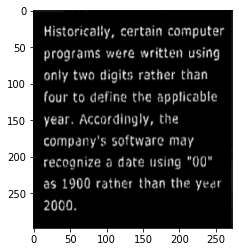

In [22]:
img1 = cv2.imread('Ej1.PNG')
plt.imshow(img1)

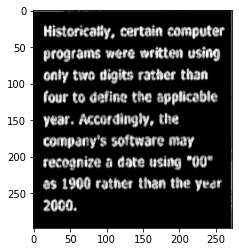

In [24]:
B = np.array([[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]], np.uint8)

dilation = cv2.dilate(img1, B, iterations = 1)

plt.imshow(dilation)      

## Ejercicio2

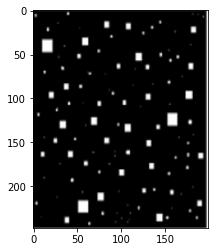

In [25]:
img = cv2.imread('cuadrados.PNG')
plt.imshow(img)

In [26]:
def MakeSubplot(img,fig,row,column,index,title):
  fig.add_subplot(row,column,index)
  plt.title(title)
  plt.axis('off')
  plt.imshow(img,cmap='gray', vmin=0)

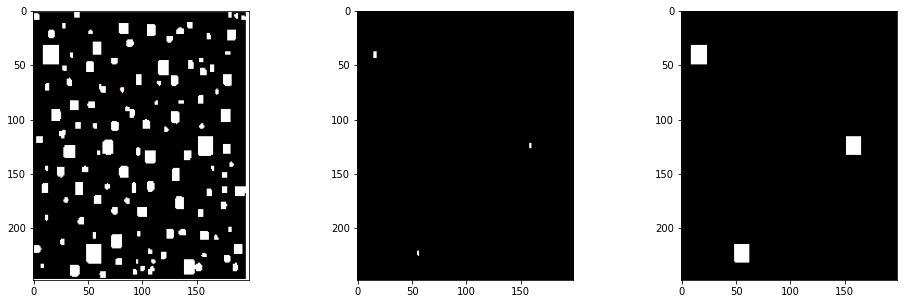

In [27]:
img[img>0] = 255
kernel = np.ones((13,13),np.uint16)
eroded = cv2.erode(img,kernel,iterations = 1)

dilated = cv2.dilate(eroded,kernel,iterations = 1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=False, figsize =(12,12))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.5, wspace = 0.5)

ax1.imshow(img)

ax2.imshow(eroded)

ax3.imshow(dilated)

plt.show()